<a href="https://colab.research.google.com/github/anagh07/stock_price_predictor/blob/master/lagged_feature_engineering_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pyspark
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import Window
import csv
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV



     |████████████████████████████████| 281.4 MB 25 kB/s 
     |████████████████████████████████| 198 kB 42.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=1529d07445984d69aa8190da1e1a4589d6a19d46793ef09a70878ac5705c9774
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


['NVDA', 'INTU', 'FTNT', 'IBM', 'EBAY', 'HP', 'ADSK', 'EA', 'AMD']
The shape of xtrain is (4531, 1, 28): 
The shape of xtest is (63, 1, 28): 
Epoch 1/100
454/454 [==============================] - 13s 7ms/step - loss: 0.0169
Epoch 2/100
454/454 [==============================] - 3s 6ms/step - loss: 0.0032
Epoch 3/100
454/454 [==============================] - 3s 6ms/step - loss: 0.0018
Epoch 4/100
454/454 [==============================] - 3s 6ms/step - loss: 0.0014
Epoch 5/100
454/454 [==============================] - 3s 6ms/step - loss: 0.0011
Epoch 6/100
454/454 [==============================] - 3s 6ms/step - loss: 9.3657e-04
Epoch 7/100
454/454 [==============================] - 3s 6ms/step - loss: 8.2577e-04
Epoch 8/100
454/454 [==============================] - 3s 6ms/step - loss: 7.3437e-04
Epoch 9/100
454/454 [==============================] - 3s 6ms/step - loss: 6.8168e-04
Epoch 10/100
454/454 [==============================] - 3s 6ms/step - loss: 6.4076e-04
Epoch 11/100
454

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:140: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


1.47733266418573
2.8560185541363357
1.6899759034188433
0.3572283862106289


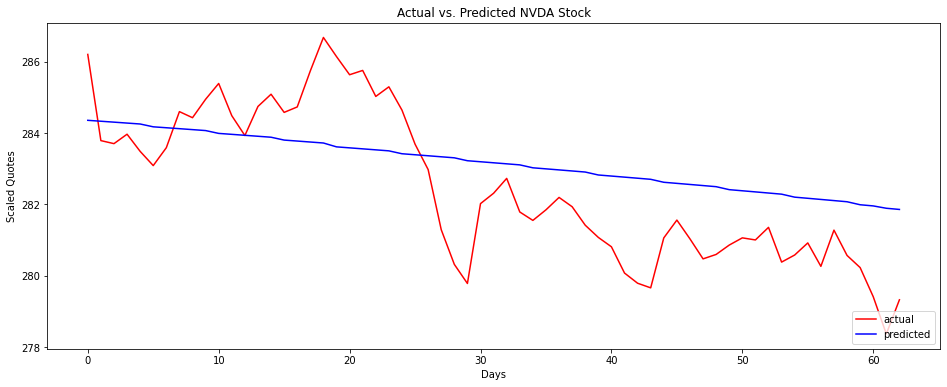

[('2018-09-28', [286.20024678231226], array([284.35486], dtype=float32)), ('2018-09-27', [283.7868409996066], array([284.3293], dtype=float32)), ('2018-09-26', [283.70179048168063], array([284.30365], dtype=float32)), ('2018-09-25', [283.96581047705325], array([284.27783], dtype=float32)), ('2018-09-24', [283.4856114026413], array([284.25183], dtype=float32)), ('2018-09-21', [283.086920877104], array([284.17307], dtype=float32)), ('2018-09-20', [283.5883825809974], array([284.14703], dtype=float32)), ('2018-09-19', [284.59840074205994], array([284.12085], dtype=float32)), ('2018-09-18', [284.42828889103515], array([284.09448], dtype=float32)), ('2018-09-17', [284.9439292863072], array([284.06793], dtype=float32)), ('2018-09-14', [285.38691875912644], array([283.98862], dtype=float32)), ('2018-09-13', [284.48499284137677], array([283.96207], dtype=float32)), ('2018-09-12', [283.92860087546063], array([283.93533], dtype=float32)), ('2018-09-11', [284.74369717937907], array([283.90845], d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:140: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


0.7460524818495219
0.8040843174095242
0.8967074870934915
-0.14926735860982587


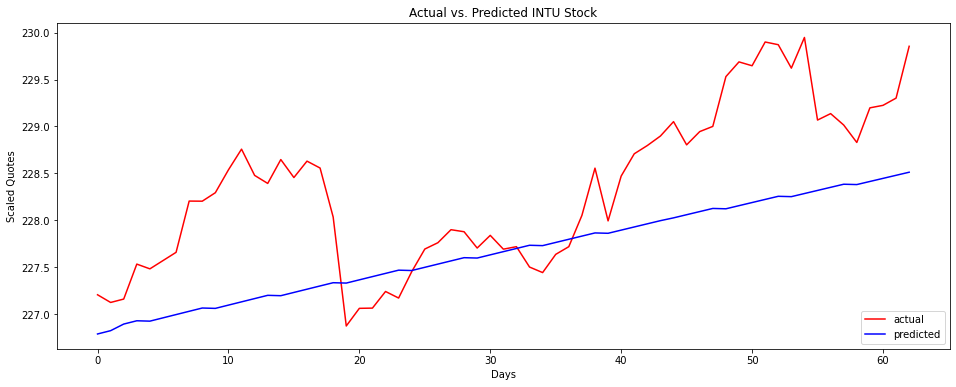

[('2018-07-02', [227.2046561830125], array([226.78632], dtype=float32)), ('2018-07-03', [227.12257206578613], array([226.82161], dtype=float32)), ('2018-07-05', [227.158785592742], array([226.89203], dtype=float32)), ('2018-07-06', [227.53178068402545], array([226.92715], dtype=float32)), ('2018-07-09', [227.48108248304584], array([226.9232], dtype=float32)), ('2018-07-10', [227.56920249508096], array([226.9583], dtype=float32)), ('2018-07-11', [227.6573206652196], array([226.99332], dtype=float32)), ('2018-07-12', [228.20413921237397], array([227.02832], dtype=float32)), ('2018-07-13', [228.20293277017083], array([227.06323], dtype=float32)), ('2018-07-16', [228.29346566661226], array([227.05934], dtype=float32)), ('2018-07-17', [228.53729960819567], array([227.09422], dtype=float32)), ('2018-07-18', [228.75820009654026], array([227.12906], dtype=float32)), ('2018-07-19', [228.47815262800103], array([227.16383], dtype=float32)), ('2018-07-20', [228.39244734226872], array([227.1986], d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:140: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


10.632587730322953
133.75326578458333
11.56517469753844
-3.550921903821786


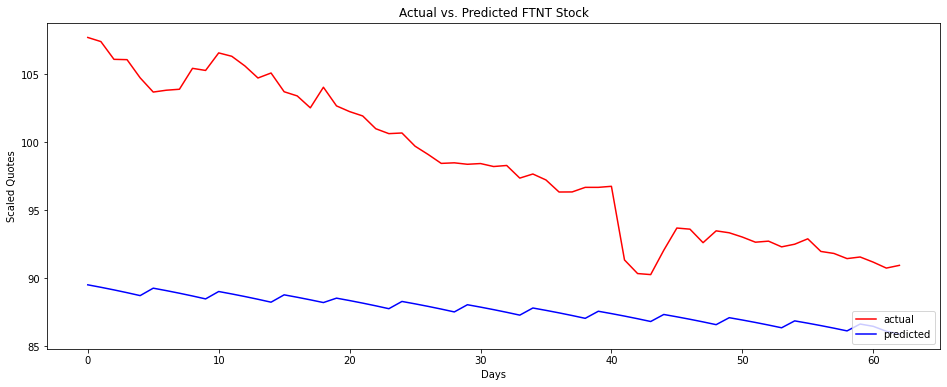

[('2018-09-28', [107.68844850672609], array([89.51626], dtype=float32)), ('2018-09-27', [107.38717170564416], array([89.33555], dtype=float32)), ('2018-09-26', [106.08162537987153], array([89.14353], dtype=float32)), ('2018-09-25', [106.0579950314876], array([88.93975], dtype=float32)), ('2018-09-24', [104.72290964347802], array([88.72376], dtype=float32)), ('2018-09-21', [103.67729264290055], array([89.2702], dtype=float32)), ('2018-09-20', [103.81316151232303], array([89.09036], dtype=float32)), ('2018-09-19', [103.88405255747485], array([88.89932], dtype=float32)), ('2018-09-18', [105.41998914620571], array([88.69663], dtype=float32)), ('2018-09-17', [105.26639413522419], array([88.481895], dtype=float32)), ('2018-09-14', [106.55421882646588], array([89.02495], dtype=float32)), ('2018-09-13', [106.30610692897675], array([88.846016], dtype=float32)), ('2018-09-12', [105.59721450557115], array([88.65599], dtype=float32)), ('2018-09-11', [104.71109672280011], array([88.45446], dtype=fl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:140: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


0.10580484445619194
0.020924271294015362
0.14465224261661264
0.01862269746192613


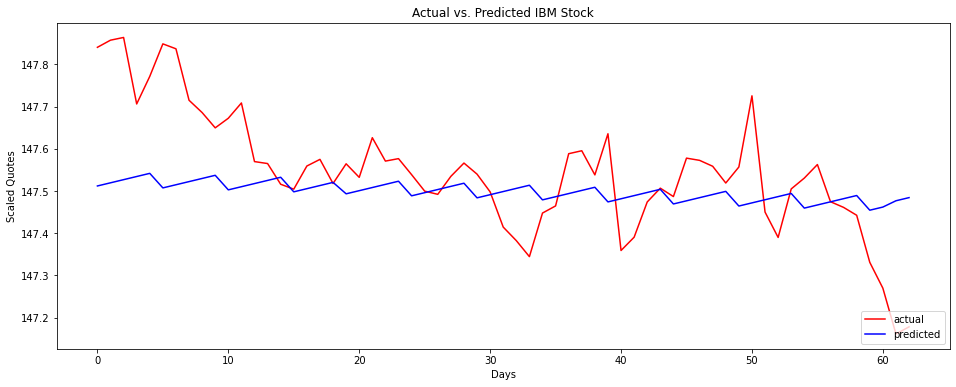

[('2018-09-28', [147.84042194086604], array([147.51187], dtype=float32)), ('2018-09-27', [147.85734640611102], array([147.51932], dtype=float32)), ('2018-09-26', [147.8637662151061], array([147.5268], dtype=float32)), ('2018-09-25', [147.70619013766827], array([147.53426], dtype=float32)), ('2018-09-24', [147.77155481796203], array([147.54173], dtype=float32)), ('2018-09-21', [147.84859252590277], array([147.50726], dtype=float32)), ('2018-09-20', [147.83691949825575], array([147.51472], dtype=float32)), ('2018-09-19', [147.71494401787655], array([147.52219], dtype=float32)), ('2018-09-18', [147.685763229813], array([147.52965], dtype=float32)), ('2018-09-17', [147.64957933758282], array([147.53712], dtype=float32)), ('2018-09-14', [147.67234031665132], array([147.50262], dtype=float32)), ('2018-09-13', [147.7085242088815], array([147.51007], dtype=float32)), ('2018-09-12', [147.5696242632573], array([147.51753], dtype=float32)), ('2018-09-11', [147.56495523030392], array([147.525], dt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:140: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


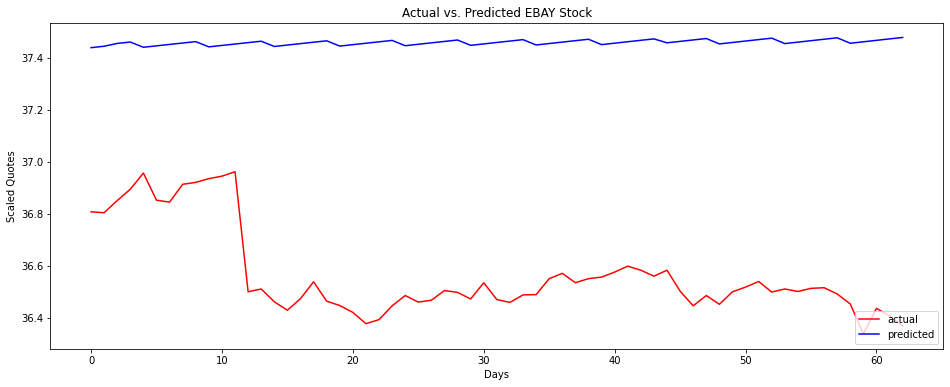

[('2018-07-02', [36.80761296434307], array([37.437775], dtype=float32)), ('2018-07-03', [36.804013146357484], array([37.44322], dtype=float32)), ('2018-07-05', [36.85081261120676], array([37.454], dtype=float32)), ('2018-07-06', [36.894012258070454], array([37.45934], dtype=float32)), ('2018-07-09', [36.95641169712254], array([37.439327], dtype=float32)), ('2018-07-10', [36.85201285570806], array([37.444782], dtype=float32)), ('2018-07-11', [36.84481276197773], array([37.450203], dtype=float32)), ('2018-07-12', [36.91321205025885], array([37.455593], dtype=float32)), ('2018-07-13', [36.92041214398918], array([37.460945], dtype=float32)), ('2018-07-16', [36.93481187369069], array([37.440853], dtype=float32)), ('2018-07-17', [36.94441199866447], array([37.44632], dtype=float32)), ('2018-07-18', [36.96121175960943], array([37.451756], dtype=float32)), ('2018-07-19', [36.500416289328676], array([37.457157], dtype=float32)), ('2018-07-20', [36.5112162010446], array([37.46253], dtype=float32

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:140: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


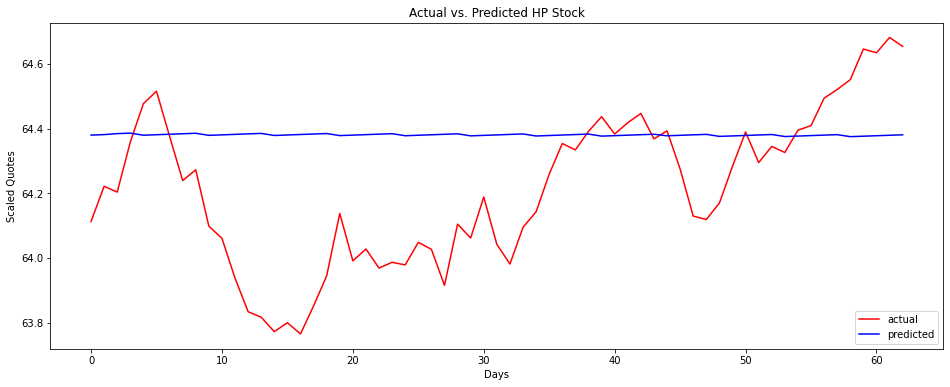

[('2018-07-02', [64.11222589523734], array([64.37964], dtype=float32)), ('2018-07-03', [64.22127036951105], array([64.38116], dtype=float32)), ('2018-07-05', [64.20339417588191], array([64.384186], dtype=float32)), ('2018-07-06', [64.3580226199979], array([64.3857], dtype=float32)), ('2018-07-09', [64.47689901781563], array([64.37925], dtype=float32)), ('2018-07-10', [64.51533271478226], array([64.38077], dtype=float32)), ('2018-07-11', [64.37589915458706], array([64.38227], dtype=float32)), ('2018-07-12', [64.23914622218015], array([64.38378], dtype=float32)), ('2018-07-13', [64.27221729973007], array([64.385284], dtype=float32)), ('2018-07-16', [64.09792500852603], array([64.37886], dtype=float32)), ('2018-07-17', [64.06038530876889], array([64.38036], dtype=float32)), ('2018-07-18', [63.93703994778386], array([64.381874], dtype=float32)), ('2018-07-19', [63.83335843388691], array([64.38337], dtype=float32)), ('2018-07-20', [63.816376237467246], array([64.38487], dtype=float32)), ('2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:140: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


1.6423105596750431
5.05509999703242
2.2483549535232243
-0.18923460805683057


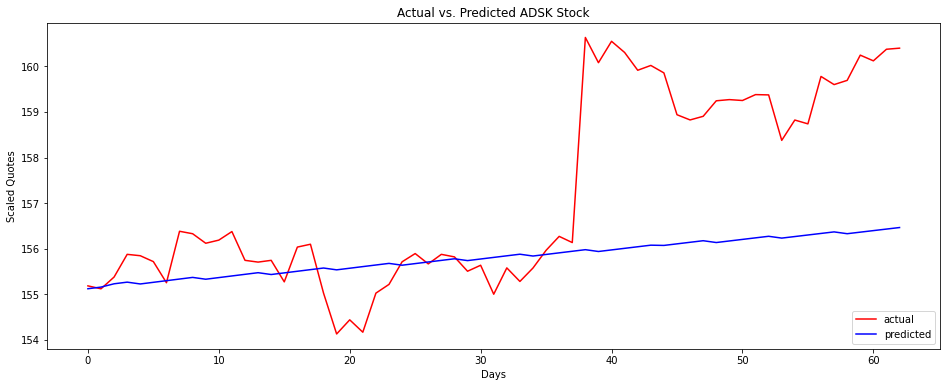

[('2018-07-02', [155.18360804677837], array([155.1206], dtype=float32)), ('2018-07-03', [155.1189827565685], array([155.15686], dtype=float32)), ('2018-07-05', [155.37749377884595], array([155.22916], dtype=float32)), ('2018-07-06', [155.87512823633784], array([155.26524], dtype=float32)), ('2018-07-09', [155.8449686718579], array([155.22536], dtype=float32)), ('2018-07-10', [155.71571151714622], array([155.26143], dtype=float32)), ('2018-07-11', [155.2525460725302], array([155.29744], dtype=float32)), ('2018-07-12', [156.38138159062174], array([155.33336], dtype=float32)), ('2018-07-13', [156.32752499068286], array([155.36925], dtype=float32)), ('2018-07-16', [156.1185611199483], array([155.32938], dtype=float32)), ('2018-07-17', [156.18749585855417], array([155.36526], dtype=float32)), ('2018-07-18', [156.37491577445476], array([155.40108], dtype=float32)), ('2018-07-19', [155.74371800100116], array([155.43683], dtype=float32)), ('2018-07-20', [155.70494282687523], array([155.47253],

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:140: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


2.7861590483060095
11.293104304582327
3.3605214334359372
-0.11742556236118284


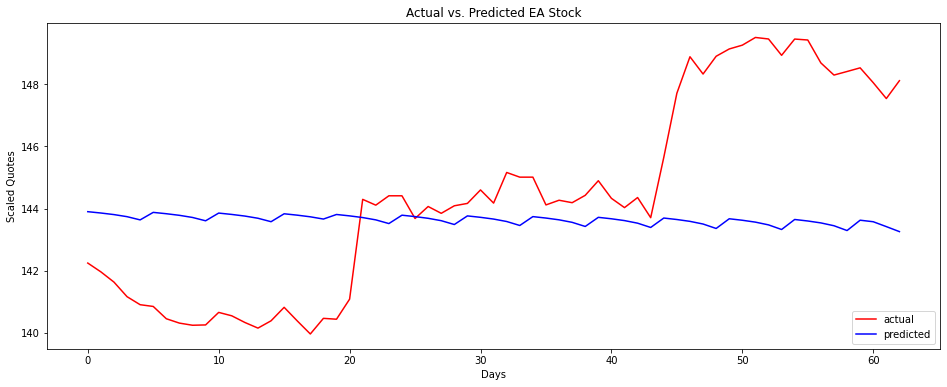

[('2018-09-28', [142.24383968733505], array([143.89948], dtype=float32)), ('2018-09-27', [141.96013801985254], array([143.85634], dtype=float32)), ('2018-09-26', [141.63043062386006], array([143.80571], dtype=float32)), ('2018-09-25', [141.1601515768459], array([143.73848], dtype=float32)), ('2018-09-24', [140.90200821409698], array([143.63474], dtype=float32)), ('2018-09-21', [140.84577877369884], array([143.87692], dtype=float32)), ('2018-09-20', [140.4496201753937], array([143.83339], dtype=float32)), ('2018-09-19', [140.30904657439834], array([143.78195], dtype=float32)), ('2018-09-18', [140.2400389566202], array([143.71306], dtype=float32)), ('2018-09-17', [140.25026266850838], array([143.60573], dtype=float32)), ('2018-09-14', [140.65408856323626], array([143.85431], dtype=float32)), ('2018-09-13', [140.54418609790542], array([143.81035], dtype=float32)), ('2018-09-12', [140.32949399817468], array([143.75807], dtype=float32)), ('2018-09-11', [140.1480274996003], array([143.68744]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:140: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


4.569094068271945
26.118824357609114
5.1106579182732546
-3.837744668188356


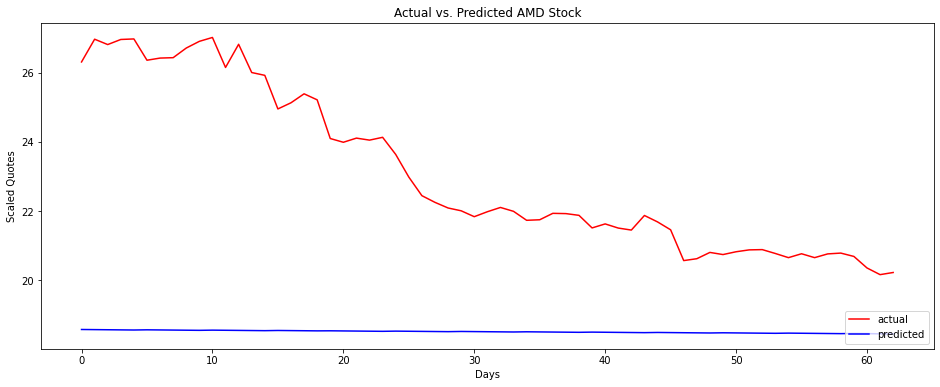

[('2018-09-28', [26.30480463284092], array([18.585045], dtype=float32)), ('2018-09-27', [26.961387349583088], array([18.581293], dtype=float32)), ('2018-09-26', [26.806896778585656], array([18.577543], dtype=float32)), ('2018-09-25', [26.95366267370009], array([18.573795], dtype=float32)), ('2018-09-24', [26.96911202546609], array([18.57005], dtype=float32)), ('2018-09-21', [26.35501428941478], array([18.575603], dtype=float32)), ('2018-09-20', [26.416810223147497], array([18.57185], dtype=float32)), ('2018-09-19', [26.428396500306356], array([18.568098], dtype=float32)), ('2018-09-18', [26.706478938769223], array([18.564348], dtype=float32)), ('2018-09-17', [26.89959141585037], array([18.5606], dtype=float32)), ('2018-09-14', [27.011597006156943], array([18.566137], dtype=float32)), ('2018-09-13', [26.146452460567627], array([18.562384], dtype=float32)), ('2018-09-12', [26.81462145446866], array([18.55863], dtype=float32)), ('2018-09-11', [25.999687302118833], array([18.55488], dtype=

In [3]:
def init_spark():
    spark = SparkSession \
        .builder \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()
    return spark

# read and clean the csv
spark = init_spark()
filename = '/content/drive/MyDrive/data/stock_histories.csv'
df = spark.read.csv(filename, header=True, mode="DROPMALFORMED")

# get list of unique companies
companies = [i.stock for i in df.select(col("stock")).distinct().collect()]
# companies = ['NVDA','INTU', 'FTNT', 'IBM', 'EBAY','HP', 'ADSK', 'EA', 'AMD']
print(companies)


for company in companies:
  df = df.withColumn("volume",df.volume.cast(IntegerType()))
  df = df.withColumn("open",df.open.cast(FloatType()))
  df = df.withColumn("close",df.close.cast(FloatType()))
  df = df.withColumn("adjusted_close",df.close.cast(FloatType()))
  df = df.withColumn("high",df.high.cast(FloatType()))
  df = df.withColumn("low",df.low.cast(FloatType()))

  company_name = company 
  company_df = df.where(df.stock == company_name)

  company_df.orderBy(["date"]).select("date").first()
  company_df.orderBy(["date"], ascending=False).select("date").first()

  # feature engineering: Quarter, week of year, year, day of week
  company_df = company_df.withColumn("quarter", quarter(col("date")))
  company_df = company_df.withColumn("week_of_year", weekofyear(col("date")))
  company_df = company_df.withColumn("year", year(col("date")))
  company_df = company_df.withColumn("day_of_week", dayofweek(col("date")))
  company_df = company_df.withColumn("year_quarter", concat(company_df.year, lit("-"), company_df.quarter).alias("year_quarter"))

  # get last full quarter
  # step 1: calculate days in each quarters - a full quarter has at least 60 days 
  quarter_day_count = company_df.groupby("year_quarter").count()\
                                                  .filter("count >= 60")
  last_quarter = quarter_day_count.orderBy(["year_quarter"], ascending=False).select("year_quarter").first()

  quarter_day_count = quarter_day_count.withColumn("is_test", when(col("year_quarter") == last_quarter[0], 1).otherwise(0))
  company_df = company_df.join(quarter_day_count, "year_quarter")
  open_average = company_df.groupby("year_quarter")\
                    .agg(avg("open").alias("open_avg"))
  windowSpec = Window.orderBy("year_quarter")
  open_average = open_average.withColumn("open_avg_l1", lag("open_avg", 1).over(windowSpec))
  open_average = open_average.withColumn("open_avg_l2", lag("open_avg", 2).over(windowSpec))
  open_average = open_average.withColumn("open_avg_l3", lag("open_avg", 3).over(windowSpec))
  open_average = open_average.withColumn("open_avg_l4", lag("open_avg", 4).over(windowSpec))
  open_average = open_average.drop("open_avg") # drop unused col
  volume_average = company_df.groupby("year_quarter")\
                      .agg(avg("volume").alias("volume_avg"))
  volume_average = volume_average.withColumn("volume_avg_l1", lag("volume_avg", 1).over(windowSpec))
  volume_average = volume_average.withColumn("volume_avg_l2", lag("volume_avg", 2).over(windowSpec))
  volume_average = volume_average.withColumn("volume_avg_l3", lag("volume_avg", 3).over(windowSpec))
  volume_average = volume_average.withColumn("volume_avg_l4", lag("volume_avg", 4).over(windowSpec))
  volume_average = volume_average.drop("volume_avg") # drop unused col
  high_average = company_df.groupby("year_quarter")\
                    .agg(avg("high").alias("high_avg"))
  high_average = high_average.withColumn("high_avg_l1", lag("high_avg", 1).over(windowSpec))
  high_average = high_average.withColumn("high_avg_l2", lag("high_avg", 2).over(windowSpec))
  high_average = high_average.withColumn("high_avg_l3", lag("high_avg", 3).over(windowSpec))
  high_average = high_average.withColumn("high_avg_l4", lag("high_avg", 4).over(windowSpec))
  high_average = high_average.drop("high_avg") # drop unused col
  low_average = company_df.groupby("year_quarter")\
                    .agg(avg("low").alias("low_avg"))
  low_average = low_average.withColumn("low_avg_l1", lag("low_avg", 1).over(windowSpec))
  low_average = low_average.withColumn("low_avg_l2", lag("low_avg", 2).over(windowSpec))
  low_average = low_average.withColumn("low_avg_l3", lag("low_avg", 3).over(windowSpec))
  low_average = low_average.withColumn("low_avg_l4", lag("low_avg", 4).over(windowSpec))
  low_average = low_average.drop("low_avg") # drop unused col
  close_average = company_df.groupby("year_quarter")\
                      .agg(avg("close").alias("close_avg"))
  close_average = close_average.withColumn("close_avg_l1", lag("close_avg", 1).over(windowSpec))
  close_average = close_average.withColumn("close_avg_l2", lag("close_avg", 2).over(windowSpec))
  close_average = close_average.withColumn("close_avg_l3", lag("close_avg", 3).over(windowSpec))
  close_average = close_average.withColumn("close_avg_l4", lag("close_avg", 4).over(windowSpec))
  close_average = close_average.drop("close_avg") # drop unused col
  adj_close_average = company_df.groupby("year_quarter")\
                          .agg(avg("adjusted_close").alias("adj_close_avg"))
  adj_close_average = adj_close_average.withColumn("adj_close_avg_l1", lag("adj_close_avg", 1).over(windowSpec))
  adj_close_average = adj_close_average.withColumn("adj_close_avg_l2", lag("adj_close_avg", 2).over(windowSpec))
  adj_close_average = adj_close_average.withColumn("adj_close_avg_l3", lag("adj_close_avg", 3).over(windowSpec))
  adj_close_average = adj_close_average.withColumn("adj_close_avg_l4", lag("adj_close_avg", 4).over(windowSpec))
  adj_close_average = adj_close_average.drop("adj_close_avg") # drop unused col
  company_df = company_df.join(open_average, "year_quarter")\
            .join(volume_average, "year_quarter")\
            .join(high_average, "year_quarter")\
            .join(low_average, "year_quarter")\
            .join(close_average, "year_quarter")\
            .join(adj_close_average, "year_quarter")
  sc = spark.sparkContext
  sc.setLogLevel("ERROR")
  # drop rows with nulls (i.e. first four quarters)
  company_df = company_df.na.drop()
  company_df = company_df.toPandas()
  predictor_features = ['quarter', 'week_of_year', 'year', 'day_of_week', 'open_avg_l1', 'open_avg_l2',
                        'open_avg_l3', 'open_avg_l4', 'volume_avg_l1', 'volume_avg_l2', 'volume_avg_l3', 
                        'volume_avg_l4', 'high_avg_l1', 'high_avg_l2', 'high_avg_l3', 'high_avg_l4', 
                        'low_avg_l1', 'low_avg_l2', 'low_avg_l3', 'low_avg_l4', 'close_avg_l1', 'close_avg_l2', 
                        'close_avg_l3', 'close_avg_l4', 'adj_close_avg_l1', 'adj_close_avg_l2', 'adj_close_avg_l3', 
                        'adj_close_avg_l4']






  ## **Preprocessing:**
  from sklearn.preprocessing import MinMaxScaler

  # scale the arrays to keep the values between 0 and 1 to match outcomes found in sigmoid or step functions that are used for activation.
  minMaxScale = MinMaxScaler()
  all_features = predictor_features.copy()
  all_features.append('adjusted_close')

  minMaxScale.fit(company_df[company_df.is_test == 0][all_features])
  testingset = minMaxScale.transform(company_df[company_df.is_test == 1][all_features])
  trainingset = minMaxScale.transform(company_df[company_df.is_test == 0][all_features])
  x_train, x_test = trainingset[:, 0:-1], testingset[:, 0:-1]
  y_train, y_test = trainingset[:, -1:], testingset[:, -1:]
  y_test_dates = company_df[company_df.is_test == 1]['date']



  import numpy as np
  from keras import models, layers

  # Build a Sequential model
  model = models.Sequential()
  model.add(layers.LSTM(1, input_shape=(1,len(predictor_features)), return_sequences=True))
  model.add(layers.LSTM(1, input_shape=(1,len(predictor_features))))
  # model.add(layers.Dropout(0.01))
  model.add(layers.Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  # Transform the testing and training data sets into three-dimensional arrays,  batch size, a number of time steps, and a number of features
  x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
  x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

  print('The shape of xtrain is {}: '.format(x_train.shape))
  print('The shape of xtest is {}: '.format(x_test.shape))

  # train the model
  loss = model.fit(x_train, y_train, batch_size=10, epochs=100)
  # testing the model
  predict = model.predict(x_test)

  ytest_to_inverse = company_df[company_df.is_test == 1]['adjusted_close']
  np.array(ytest_to_inverse)
  ytest_to_inverse=ytest_to_inverse[:,np.newaxis]
  minMaxScale.fit_transform(ytest_to_inverse)
  predict = minMaxScale.inverse_transform(predict)
  y_test = minMaxScale.inverse_transform(y_test)

  print(metrics.mean_absolute_error(y_test, predict))
  print(metrics.mean_squared_error(y_test, predict))
  print(np.sqrt(metrics.mean_squared_error(y_test, predict)))
  print(metrics.r2_score(y_test, predict))
  [(y_test.tolist()[i][0], predict[i][0]) for i in range(len(y_test))]

  from matplotlib import pyplot as plt
  # Combine the predicted and ytest arrays into a single unified array
  combined_array = np.concatenate((y_test, predict), axis = 1)
  # plot a side by side comparison of Actual versus Predicted stock to compare trends
  plt.figure(figsize=(16,6))
  plt.plot(combined_array[:,0],color='red', label='actual')
  plt.plot(combined_array[:,1],color='blue', label='predicted')
  plt.legend(loc = 'lower right')
  plt.title('Actual vs. Predicted ' + company_name + ' Stock')
  plt.xlabel('Days')
  plt.ylabel('Scaled Quotes')
  plt.savefig("quarterly-" + company_name+".png")

  plt.show()


  output = [(y_test_dates.tolist()[i], y_test.tolist()[i], predict[i]) for i in range(len(y_test))]
  print(output)

  #save quartely model to disk
  header_list = ["date", "test_value", "predicted_value"]
  with open("/content/drive/MyDrive/quarterly-LSTM/quarterly-" + company_name + "-results.csv", mode='w') as file:
      csv_out = csv.writer(file)
      csv_out.writerow(header_list)
      for row in output:
          csv_out.writerow(row)
      csv_out.writerow([np.sqrt(metrics.mean_squared_error(y_test, predict))])


# **Lagged Features**

['AAPL', 'CSCO', 'QCOM', 'EXPE', 'INTC', 'GOOG', 'FB', 'NFLX', 'TXN', 'AVGO', 'ORCL', 'AMZN', 'MSFT', 'CRM', 'ADBE', 'BKNG', 'NVDA', 'EA', 'HP', 'INTU', 'IBM', 'ADSK', 'EBAY', 'AMD', 'FTNT']
The shape of xtrain is (9451, 1, 29): 
The shape of xtest is (44, 1, 29): 
Epoch 1/100
946/946 [==============================] - 13s 7ms/step - loss: 0.0125
Epoch 2/100
946/946 [==============================] - 6s 6ms/step - loss: 0.0021
Epoch 3/100
946/946 [==============================] - 6s 6ms/step - loss: 0.0014
Epoch 4/100
946/946 [==============================] - 6s 6ms/step - loss: 0.0012
Epoch 5/100
946/946 [==============================] - 6s 6ms/step - loss: 0.0010
Epoch 6/100
946/946 [==============================] - 6s 6ms/step - loss: 9.0805e-04
Epoch 7/100
946/946 [==============================] - 6s 6ms/step - loss: 8.2664e-04
Epoch 8/100
946/946 [==============================] - 5s 5ms/step - loss: 7.9165e-04
Epoch 9/100
946/946 [==============================] - 5s 5ms/ste

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


2.8855306972739956
8.98209978608731
2.99701514612244


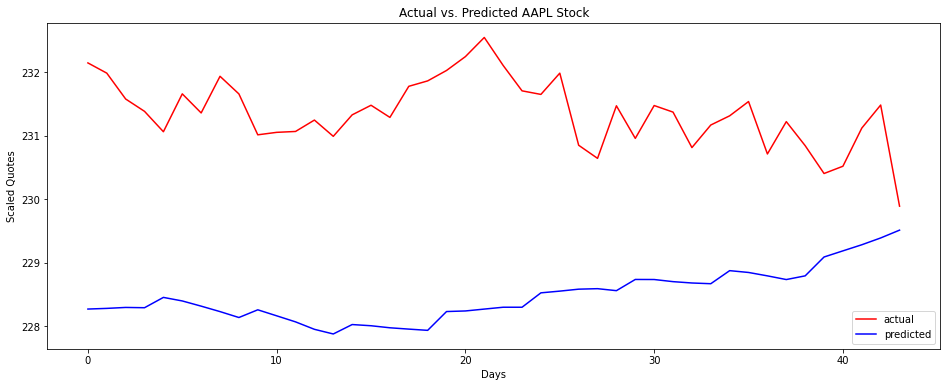

[('2018-09-04', [232.14894007630033], array([228.27007], dtype=float32)), ('2018-09-05', [231.9878413836251], array([228.2806], dtype=float32)), ('2018-09-06', [231.58023194574798], array([228.29553], dtype=float32)), ('2018-09-07', [231.38561646293266], array([228.29105], dtype=float32)), ('2018-09-10', [231.06450132873064], array([228.45372], dtype=float32)), ('2018-09-11', [231.66132159277325], array([228.3978], dtype=float32)), ('2018-09-12', [231.36074943311465], array([228.3159], dtype=float32)), ('2018-09-13', [231.9381073239892], array([228.22989], dtype=float32)), ('2018-09-14', [231.6602393416248], array([228.13673], dtype=float32)), ('2018-09-17', [231.01584787047008], array([228.25821], dtype=float32)), ('2018-09-18', [231.05477096703316], array([228.16359], dtype=float32)), ('2018-09-19', [231.06882538400515], array([228.06815], dtype=float32)), ('2018-09-20', [231.2483041987], array([227.9508], dtype=float32)), ('2018-09-21', [230.9920614420275], array([227.87733], dtype=

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


0.6133890839195998
0.3851824811728328
0.6206307123989537


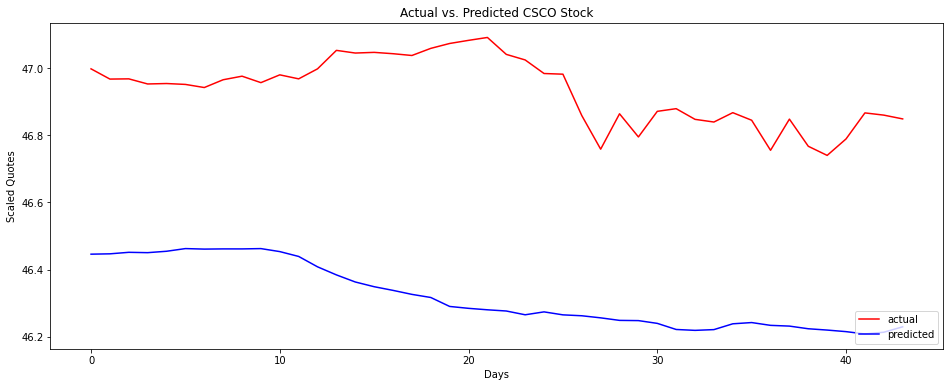

[('2018-09-04', [46.99774076948296], array([46.445908], dtype=float32)), ('2018-09-05', [46.96726252830478], array([46.446922], dtype=float32)), ('2018-09-06', [46.967924988873406], array([46.451427], dtype=float32)), ('2018-09-07', [46.95268586828432], array([46.45041], dtype=float32)), ('2018-09-10', [46.95401104217264], array([46.454563], dtype=float32)), ('2018-09-11', [46.951360694395994], array([46.462532], dtype=float32)), ('2018-09-12', [46.94208472992882], array([46.461002], dtype=float32)), ('2018-09-13', [46.96527489384784], array([46.461594], dtype=float32)), ('2018-09-14', [46.97587603220334], array([46.46156], dtype=float32)), ('2018-09-17', [46.95666138994928], array([46.46251], dtype=float32)), ('2018-09-18', [46.97985130111723], array([46.453568], dtype=float32)), ('2018-09-19', [46.967924988873406], array([46.43915], dtype=float32)), ('2018-09-20', [46.99774076948296], array([46.40823], dtype=float32)), ('2018-09-21', [47.05273434846847], array([46.384205], dtype=floa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


0.9771138584746304
1.2534476584030834
1.1195747667766915


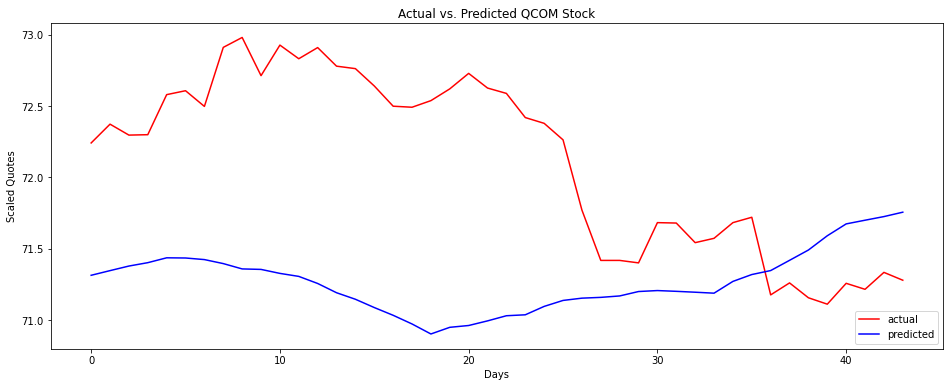

[('2018-09-04', [72.24149930248983], array([71.31342], dtype=float32)), ('2018-09-05', [72.3732378025259], array([71.34614], dtype=float32)), ('2018-09-06', [72.29651082603874], array([71.378235], dtype=float32)), ('2018-09-07', [72.2994057043334], array([71.4019], dtype=float32)), ('2018-09-10', [72.58025639214875], array([71.436005], dtype=float32)), ('2018-09-11', [72.60776270617013], array([71.434685], dtype=float32)), ('2018-09-12', [72.49773855457846], array([71.42352], dtype=float32)), ('2018-09-13', [72.91177573382416], array([71.395424], dtype=float32)), ('2018-09-14', [72.98126385783397], array([71.35808], dtype=float32)), ('2018-09-17', [72.71344288357909], array([71.35467], dtype=float32)), ('2018-09-18', [72.92770032567928], array([71.326706], dtype=float32)), ('2018-09-19', [72.83215277454852], array([71.30565], dtype=float32)), ('2018-09-20', [72.91032774242993], array([71.25602], dtype=float32)), ('2018-09-21', [72.78003612929425], array([71.191124], dtype=float32)), ('

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


1.6255691528839677
3.446247007825143
1.8564070156690162


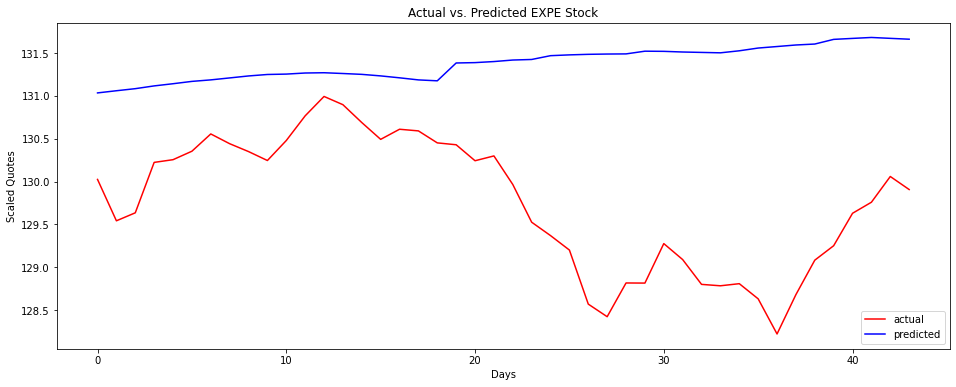

[('2018-09-04', [130.02465376724842], array([131.03403], dtype=float32)), ('2018-09-05', [129.54202651219512], array([131.05936], dtype=float32)), ('2018-09-06', [129.63526125150779], array([131.08354], dtype=float32)), ('2018-09-07', [130.22346367625755], array([131.11575], dtype=float32)), ('2018-09-10', [130.25499835578182], array([131.1412], dtype=float32)), ('2018-09-11', [130.35371761459115], array([131.16843], dtype=float32)), ('2018-09-12', [130.55526926031598], array([131.18607], dtype=float32)), ('2018-09-13', [130.44146783440718], array([131.20885], dtype=float32)), ('2018-09-14', [130.34960448648496], array([131.23189], dtype=float32)), ('2018-09-17', [130.24539966211384], array([131.249], dtype=float32)), ('2018-09-18', [130.47848598736297], array([131.25354], dtype=float32)), ('2018-09-19', [130.76641750757855], array([131.26619], dtype=float32)), ('2018-09-20', [130.9926479219406], array([131.26938], dtype=float32)), ('2018-09-21', [130.89667144591215], array([131.26033]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


0.28420693458020824
0.12118637636601214
0.34811833672763076


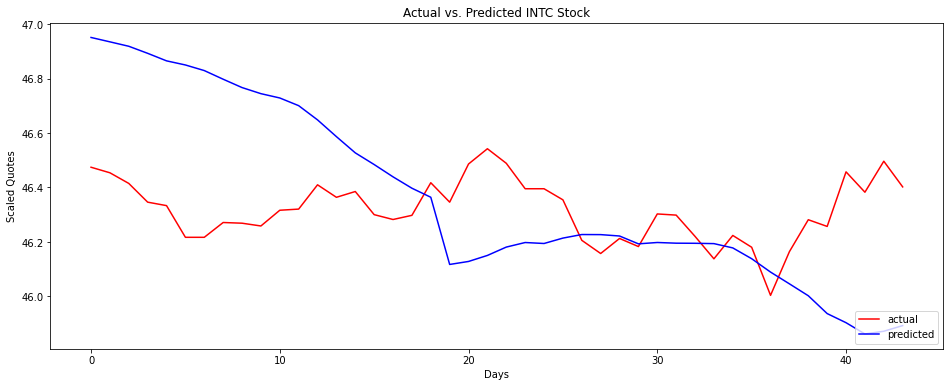

[('2018-09-04', [46.47438699400614], array([46.950893], dtype=float32)), ('2018-09-05', [46.4540064708996], array([46.934822], dtype=float32)), ('2018-09-06', [46.41494320771735], array([46.91855], dtype=float32)), ('2018-09-07', [46.346158537304575], array([46.89267], dtype=float32)), ('2018-09-10', [46.33342046740605], array([46.86502], dtype=float32)), ('2018-09-11', [46.21708070317373], array([46.849888], dtype=float32)), ('2018-09-12', [46.21708070317373], array([46.829327], dtype=float32)), ('2018-09-13', [46.27142919671459], array([46.79756], dtype=float32)), ('2018-09-14', [46.268881712311924], array([46.76693], dtype=float32)), ('2018-09-17', [46.25869112681608], array([46.74455], dtype=float32)), ('2018-09-18', [46.31643648218889], array([46.728703], dtype=float32)), ('2018-09-19', [46.32068272145011], array([46.700485], dtype=float32)), ('2018-09-20', [46.409848238912], array([46.648254], dtype=float32)), ('2018-09-21', [46.36399157600844], array([46.58676], dtype=float32)),

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


5.969516246341564
49.74747262644052
7.053188826796041


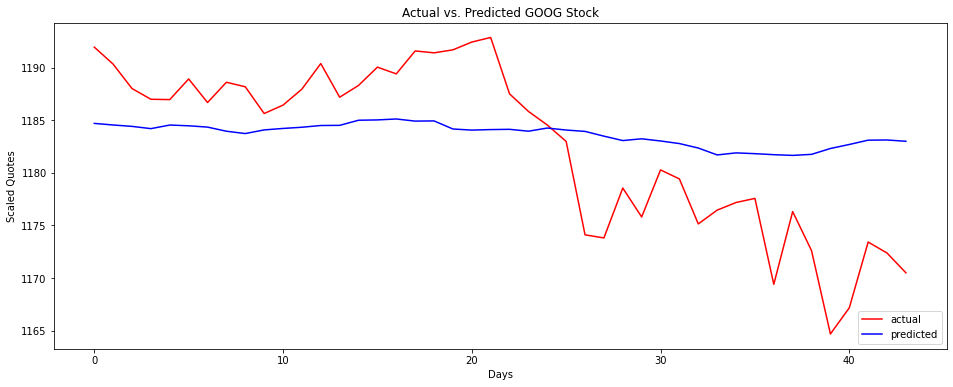

[('2018-09-04', [1191.9544822363048], array([1184.7009], dtype=float32)), ('2018-09-05', [1190.3328237039566], array([1184.5513], dtype=float32)), ('2018-09-06', [1188.0144052257303], array([1184.418], dtype=float32)), ('2018-09-07', [1186.9954775410226], array([1184.2041], dtype=float32)), ('2018-09-10', [1186.966198117997], array([1184.5454], dtype=float32)), ('2018-09-11', [1188.9269786052068], array([1184.4745], dtype=float32)), ('2018-09-12', [1186.6856350091864], array([1184.3494], dtype=float32)), ('2018-09-13', [1188.6140500673446], array([1183.9575], dtype=float32)), ('2018-09-14', [1188.1824420172582], array([1183.7356], dtype=float32)), ('2018-09-17', [1185.6420569104916], array([1184.0829], dtype=float32)), ('2018-09-18', [1186.4389991495495], array([1184.2222], dtype=float32)), ('2018-09-19', [1187.9604565716083], array([1184.3365], dtype=float32)), ('2018-09-20', [1190.3929443701304], array([1184.5023], dtype=float32)), ('2018-09-21', [1187.18970774955], array([1184.5154]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


5.016750451000302
27.858162151818956
5.278083189171895


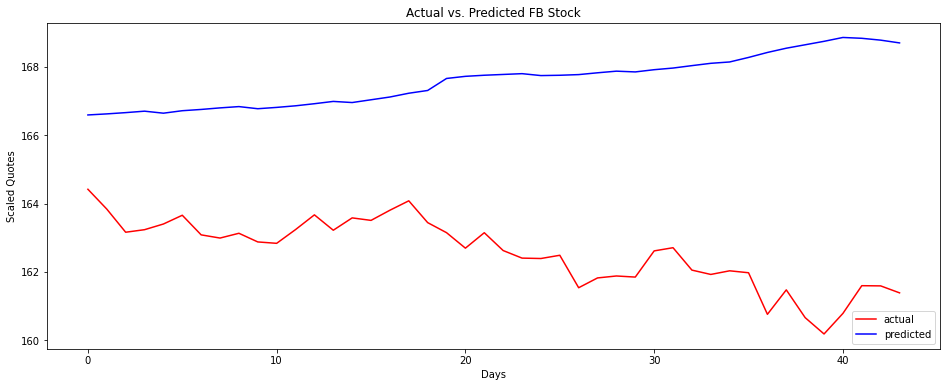

[('2018-09-04', [164.41672326909804], array([166.58923], dtype=float32)), ('2018-09-05', [163.83756246237067], array([166.62013], dtype=float32)), ('2018-09-06', [163.16090749191548], array([166.65718], dtype=float32)), ('2018-09-07', [163.2351205609297], array([166.69963], dtype=float32)), ('2018-09-10', [163.4010102955172], array([166.64088], dtype=float32)), ('2018-09-11', [163.6571223211395], array([166.71298], dtype=float32)), ('2018-09-12', [163.0837834534049], array([166.75012], dtype=float32)), ('2018-09-13', [162.99065241329293], array([166.79578], dtype=float32)), ('2018-09-14', [163.13035008367044], array([166.83359], dtype=float32)), ('2018-09-17', [162.87714902754456], array([166.77135], dtype=float32)), ('2018-09-18', [162.83640433627176], array([166.80997], dtype=float32)), ('2018-09-19', [163.23803153042607], array([166.8566], dtype=float32)), ('2018-09-20', [163.6687639787059], array([166.91785], dtype=float32)), ('2018-09-21', [163.2191135593283], array([166.9849], dt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


8.056173896134462
83.81169484335716
9.154872737693143


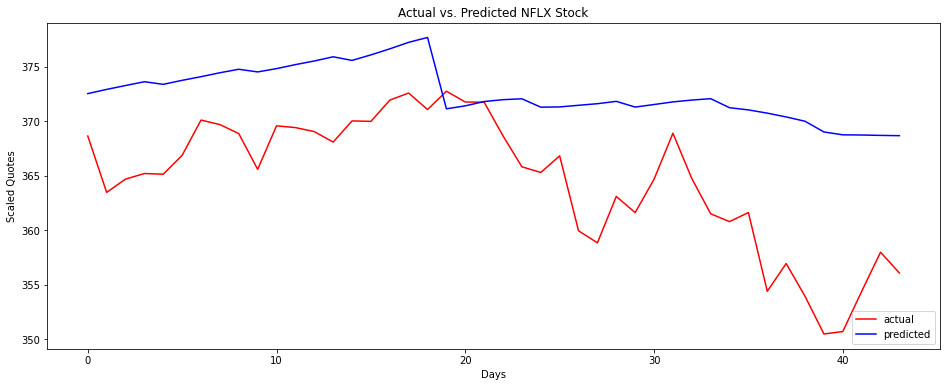

[('2018-09-04', [368.6535367813513], array([372.54776], dtype=float32)), ('2018-09-05', [363.48018802922667], array([372.93472], dtype=float32)), ('2018-09-06', [364.6985314162251], array([373.2901], dtype=float32)), ('2018-09-07', [365.21078983131736], array([373.63962], dtype=float32)), ('2018-09-10', [365.1484907015033], array([373.39993], dtype=float32)), ('2018-09-11', [366.8837049066717], array([373.76715], dtype=float32)), ('2018-09-12', [370.11878104882214], array([374.10266], dtype=float32)), ('2018-09-13', [369.70343239121826], array([374.4631], dtype=float32)), ('2018-09-14', [368.87505184030465], array([374.78415], dtype=float32)), ('2018-09-17', [365.5961402643244], array([374.53854], dtype=float32)), ('2018-09-18', [369.5880589377456], array([374.84238], dtype=float32)), ('2018-09-19', [369.4288430086063], array([375.21103], dtype=float32)), ('2018-09-20', [369.0596465491262], array([375.54236], dtype=float32)), ('2018-09-21', [368.0974358905924], array([375.92834], dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


1.5460662511499892
2.9326131307969048
1.7124874104053742


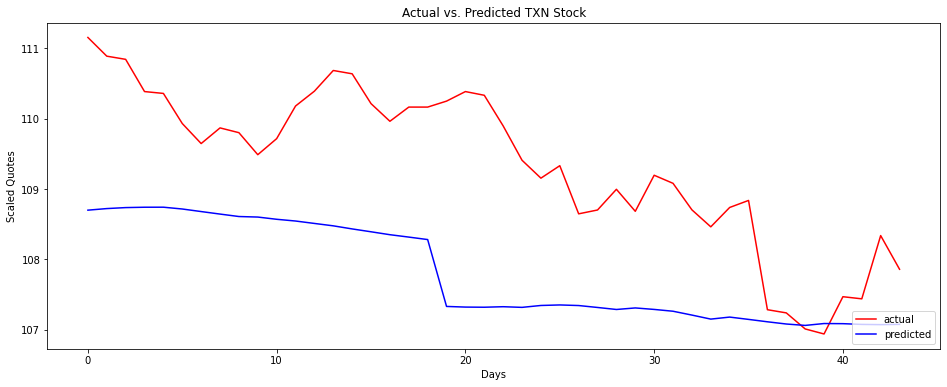

[('2018-09-04', [111.15475705671376], array([108.700264], dtype=float32)), ('2018-09-05', [110.88901461422813], array([108.72283], dtype=float32)), ('2018-09-06', [110.84378237815433], array([108.73681], dtype=float32)), ('2018-09-07', [110.38580185392495], array([108.741936], dtype=float32)), ('2018-09-10', [110.35941626305635], array([108.74242], dtype=float32)), ('2018-09-11', [109.93159152148073], array([108.71677], dtype=float32)), ('2018-09-12', [109.64700243378994], array([108.68043], dtype=float32)), ('2018-09-13', [109.86939629818748], array([108.644646], dtype=float32)), ('2018-09-14', [109.80154722512334], array([108.60991], dtype=float32)), ('2018-09-17', [109.48868745067136], array([108.60228], dtype=float32)), ('2018-09-18', [109.71673660274664], array([108.57055], dtype=float32)), ('2018-09-19', [110.18037097674689], array([108.54598], dtype=float32)), ('2018-09-20', [110.39145570369583], array([108.511566], dtype=float32)), ('2018-09-21', [110.68546883294263], array([10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


1.2128244195193192
2.5123161480510814
1.585028753067616


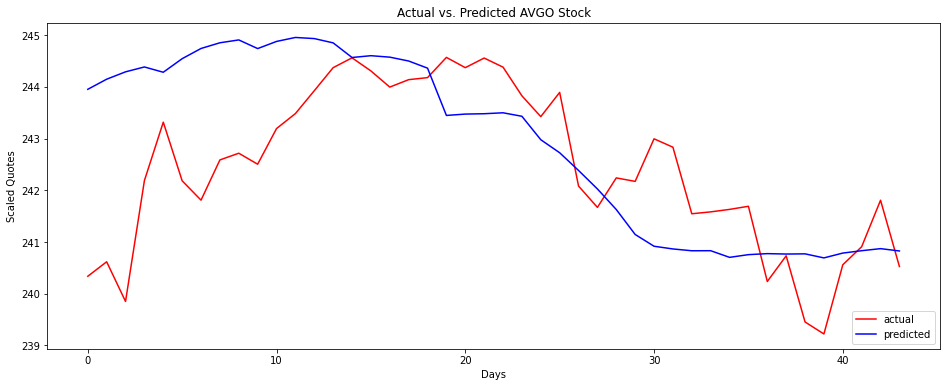

[('2018-09-04', [240.3371015408674], array([243.95238], dtype=float32)), ('2018-09-05', [240.6171152343278], array([244.14792], dtype=float32)), ('2018-09-06', [239.85024610755022], array([244.29042], dtype=float32)), ('2018-09-07', [242.1874394646848], array([244.38461], dtype=float32)), ('2018-09-10', [243.3173406757103], array([244.28236], dtype=float32)), ('2018-09-11', [242.18321833614064], array([244.54475], dtype=float32)), ('2018-09-12', [241.80892919342008], array([244.7422], dtype=float32)), ('2018-09-13', [242.5870553786702], array([244.85231], dtype=float32)), ('2018-09-14', [242.71650833050785], array([244.90747], dtype=float32)), ('2018-09-17', [242.50403698788264], array([244.7402], dtype=float32)), ('2018-09-18', [243.19351517957676], array([244.87837], dtype=float32)), ('2018-09-19', [243.4833774572854], array([244.9551], dtype=float32)), ('2018-09-20', [243.92520680377677], array([244.93347], dtype=float32)), ('2018-09-21', [244.37125942587667], array([244.85033], dty

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


0.7687811033462272
0.6380661370808461
0.7987904212500586


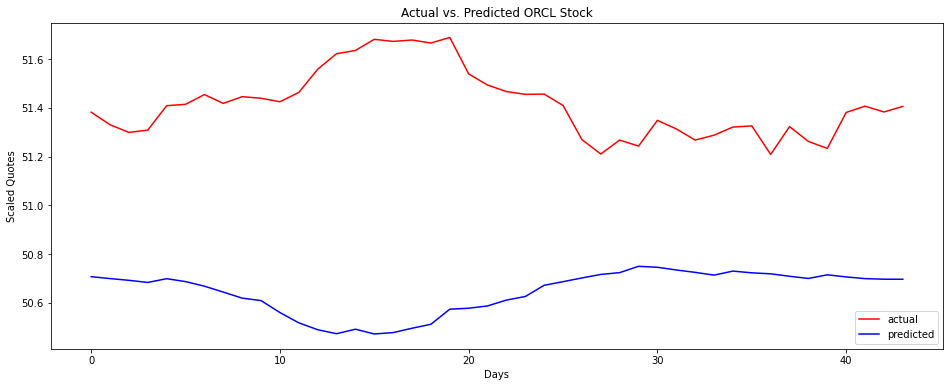

[('2018-09-04', [51.38197129018422], array([50.707287], dtype=float32)), ('2018-09-05', [51.33055071917497], array([50.69951], dtype=float32)), ('2018-09-06', [51.29912691580908], array([50.692295], dtype=float32)), ('2018-09-07', [51.30864944557785], array([50.68363], dtype=float32)), ('2018-09-10', [51.40863364704204], array([50.699005], dtype=float32)), ('2018-09-11', [51.414346801655924], array([50.68706], dtype=float32)), ('2018-09-12', [51.45434070019002], array([50.668297], dtype=float32)), ('2018-09-13', [51.41815581356344], array([50.64405], dtype=float32)), ('2018-09-14', [51.44577060502181], array([50.61927], dtype=float32)), ('2018-09-17', [51.439105015807364], array([50.6092], dtype=float32)), ('2018-09-18', [51.424821402777894], array([50.560165], dtype=float32)), ('2018-09-19', [51.46291079535824], array([50.51799], dtype=float32)), ('2018-09-20', [51.55813391356172], array([50.489716], dtype=float32)), ('2018-09-21', [51.621933228399314], array([50.47327], dtype=float32

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


37.31351787063383
2646.774137094845
51.44680881351967


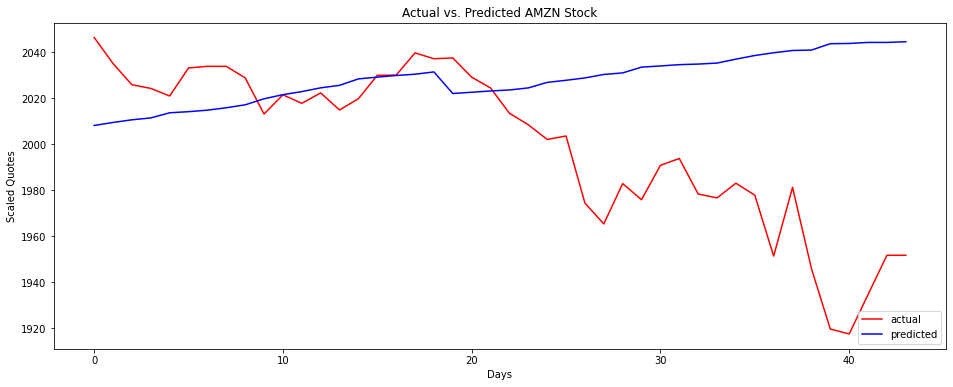

[('2018-09-04', [2046.295578694952], array([2008.0449], dtype=float32)), ('2018-09-05', [2034.980305211831], array([2009.3425], dtype=float32)), ('2018-09-06', [2025.7362063680878], array([2010.5032], dtype=float32)), ('2018-09-07', [2024.1562449225205], array([2011.3132], dtype=float32)), ('2018-09-10', [2020.8495422253447], array([2013.546], dtype=float32)), ('2018-09-11', [2033.0383240003853], array([2014.0309], dtype=float32)), ('2018-09-12', [2033.759921838169], array([2014.6921], dtype=float32)), ('2018-09-13', [2033.727005330813], array([2015.7399], dtype=float32)), ('2018-09-14', [2028.7441260825312], array([2017.0175], dtype=float32)), ('2018-09-17', [2013.0055848836978], array([2019.633], dtype=float32)), ('2018-09-18', [2021.366068676925], array([2021.4233], dtype=float32)), ('2018-09-19', [2017.6618334749492], array([2022.7594], dtype=float32)), ('2018-09-20', [2022.1889504533056], array([2024.3903], dtype=float32)), ('2018-09-21', [2014.7728767997671], array([2025.4867], d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


0.6019739025022866
0.45669978671549705
0.6757956693524286


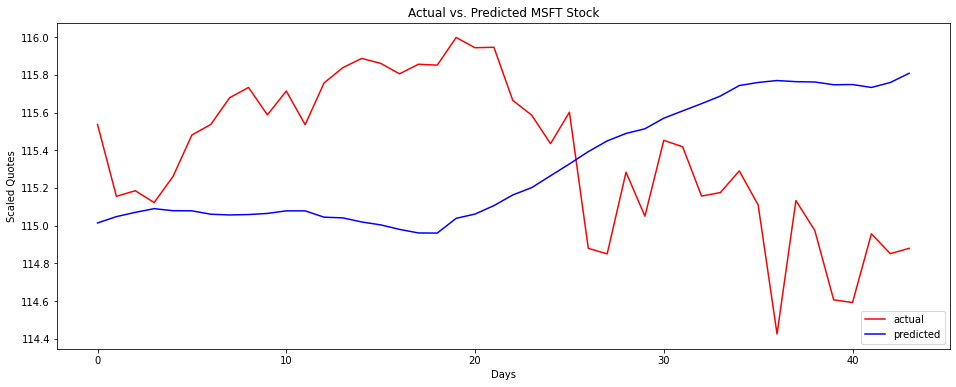

[('2018-09-04', [115.53658814300196], array([115.01386], dtype=float32)), ('2018-09-05', [115.15530474214725], array([115.04746], dtype=float32)), ('2018-09-06', [115.18490747943841], array([115.07021], dtype=float32)), ('2018-09-07', [115.12214982092578], array([115.08982], dtype=float32)), ('2018-09-10', [115.26069041463148], array([115.07893], dtype=float32)), ('2018-09-11', [115.48093485234996], array([115.07826], dtype=float32)), ('2018-09-12', [115.53658814300196], array([115.0603], dtype=float32)), ('2018-09-13', [115.6786818240418], array([115.05633], dtype=float32)), ('2018-09-14', [115.73315075224906], array([115.05857], dtype=float32)), ('2018-09-17', [115.5875048872789], array([115.06444], dtype=float32)), ('2018-09-18', [115.71420456674889], array([115.07824], dtype=float32)), ('2018-09-19', [115.53540378055722], array([115.0781], dtype=float32)), ('2018-09-20', [115.75683258072046], array([115.04458], dtype=float32)), ('2018-09-21', [115.83853642473326], array([115.040825

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


2.0574530429589086
6.696776528965682
2.587813078443975


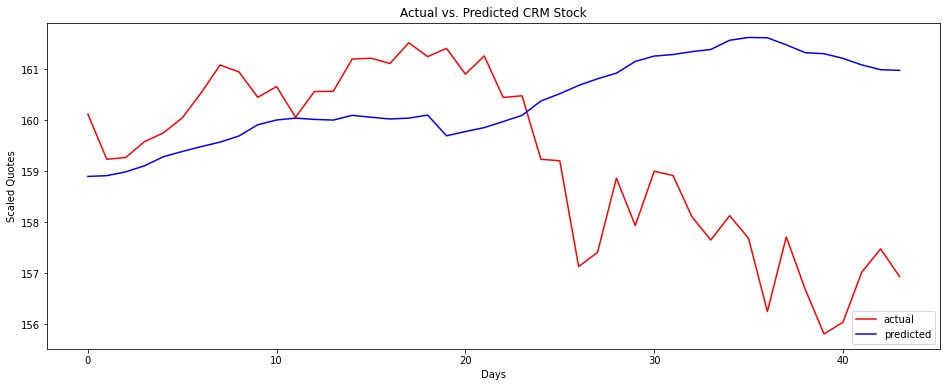

[('2018-09-04', [160.12107924928134], array([158.89836], dtype=float32)), ('2018-09-05', [159.23515234752523], array([158.91364], dtype=float32)), ('2018-09-06', [159.27012458952365], array([158.98831], dtype=float32)), ('2018-09-07', [159.58097348154942], array([159.10759], dtype=float32)), ('2018-09-10', [159.7538870130645], array([159.28537], dtype=float32)), ('2018-09-11', [160.04919301581356], array([159.38846], dtype=float32)), ('2018-09-12', [160.5407254017413], array([159.48395], dtype=float32)), ('2018-09-13', [161.0866564178861], array([159.57257], dtype=float32)), ('2018-09-14', [160.95260455631737], array([159.6924], dtype=float32)), ('2018-09-17', [160.45329924349974], array([159.9135], dtype=float32)), ('2018-09-18', [160.66312380198124], array([160.00722], dtype=float32)), ('2018-09-19', [160.06084944164536], array([160.0435], dtype=float32)), ('2018-09-20', [160.5659829673789], array([160.01846], dtype=float32)), ('2018-09-21', [160.56986943082381], array([160.00505], d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


1.963426201924772
6.656194122163334
2.579960100885929


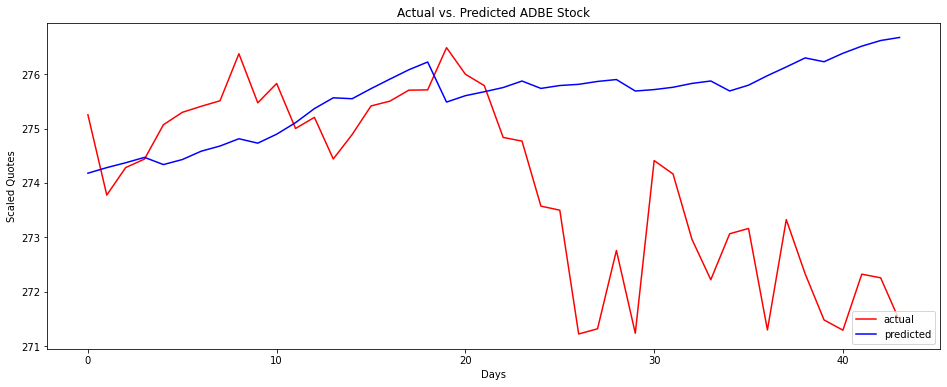

[('2018-09-04', [275.25441958287604], array([274.17938], dtype=float32)), ('2018-09-05', [273.77653150165213], array([274.28195], dtype=float32)), ('2018-09-06', [274.2827141815995], array([274.3716], dtype=float32)), ('2018-09-07', [274.4397569600973], array([274.4704], dtype=float32)), ('2018-09-10', [275.0707351602657], array([274.33798], dtype=float32)), ('2018-09-11', [275.2992901707596], array([274.43027], dtype=float32)), ('2018-09-12', [275.4100630973802], array([274.5837], dtype=float32)), ('2018-09-13', [275.5124190445646], array([274.67926], dtype=float32)), ('2018-09-14', [276.3775621484861], array([274.8133], dtype=float32)), ('2018-09-17', [275.47456189302864], array([274.73212], dtype=float32)), ('2018-09-18', [275.8307152308258], array([274.8971], dtype=float32)), ('2018-09-19', [275.0020300144466], array([275.1092], dtype=float32)), ('2018-09-20', [275.20674618791026], array([275.368], dtype=float32)), ('2018-09-21', [274.4411605031858], array([275.56696], dtype=float3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


12.67814578547596
201.27601532781225
14.187177849305064


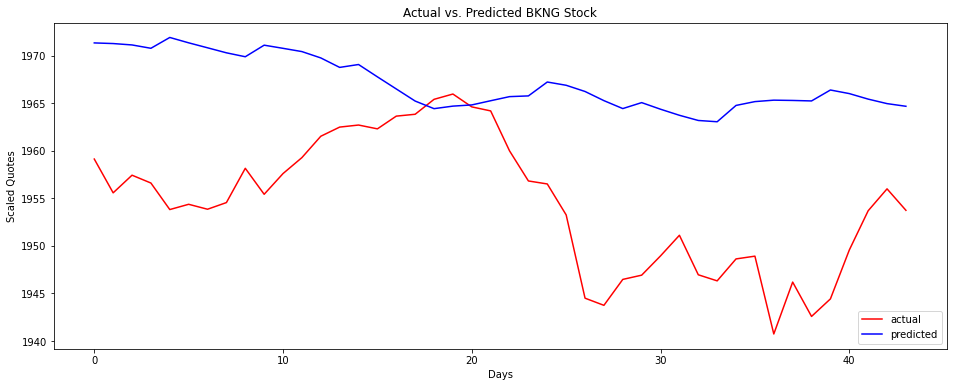

[('2018-09-04', [1959.1355794723327], array([1971.3529], dtype=float32)), ('2018-09-05', [1955.58103389093], array([1971.2861], dtype=float32)), ('2018-09-06', [1957.4365090383392], array([1971.1394], dtype=float32)), ('2018-09-07', [1956.6126903655677], array([1970.7886], dtype=float32)), ('2018-09-10', [1953.8219647257367], array([1971.9265], dtype=float32)), ('2018-09-11', [1954.3758283400598], array([1971.3628], dtype=float32)), ('2018-09-12', [1953.8562403740534], array([1970.8398], dtype=float32)), ('2018-09-13', [1954.5557983790254], array([1970.312], dtype=float32)), ('2018-09-14', [1958.161777048878], array([1969.8983], dtype=float32)), ('2018-09-17', [1955.4289054602307], array([1971.1156], dtype=float32)), ('2018-09-18', [1957.6089857745637], array([1970.7834], dtype=float32)), ('2018-09-19', [1959.2877079030325], array([1970.4412], dtype=float32)), ('2018-09-20', [1961.5331355712904], array([1969.7743], dtype=float32)), ('2018-09-21', [1962.4973000119862], array([1968.7772]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


9.163456891519688
116.59096944680745
10.797729828385568


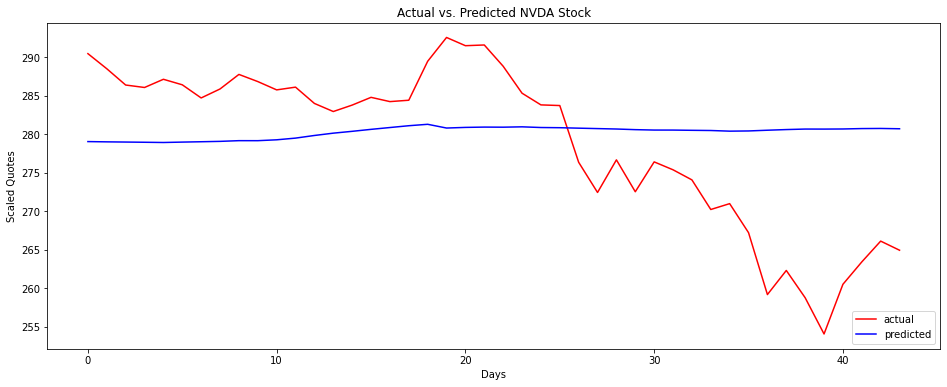

[('2018-09-04', [290.4816426733066], array([279.05365], dtype=float32)), ('2018-09-05', [288.520608574551], array([279.0193], dtype=float32)), ('2018-09-06', [286.4035781037977], array([278.99347], dtype=float32)), ('2018-09-07', [286.08416127903087], array([278.9661], dtype=float32)), ('2018-09-10', [287.1501119296535], array([278.93588], dtype=float32)), ('2018-09-11', [286.43328576135826], array([278.98715], dtype=float32)), ('2018-09-12', [284.72481775700237], array([279.03333], dtype=float32)), ('2018-09-13', [285.89103316870114], array([279.0823], dtype=float32)), ('2018-09-14', [287.7814988294667], array([279.17386], dtype=float32)), ('2018-09-17', [286.8529786816757], array([279.1711], dtype=float32)), ('2018-09-18', [285.77217986951007], array([279.2857], dtype=float32)), ('2018-09-19', [286.1287397670834], array([279.5057], dtype=float32)), ('2018-09-20', [284.0117092963301], array([279.84735], dtype=float32)), ('2018-09-21', [282.9606294761995], array([280.14868], dtype=floa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


5.505970336111519
33.42316693485155
5.781277275382279


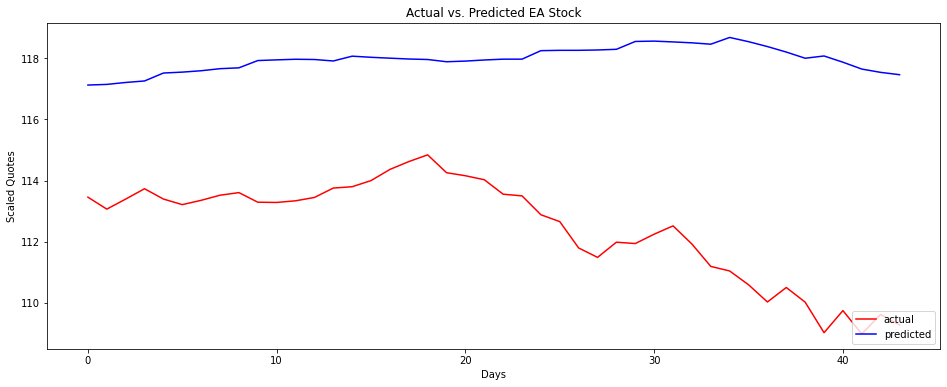

[('2018-09-04', [113.45479997422984], array([117.12429], dtype=float32)), ('2018-09-05', [113.06340502180552], array([117.14577], dtype=float32)), ('2018-09-06', [113.39122298297256], array([117.20911], dtype=float32)), ('2018-09-07', [113.73096418790446], array([117.258064], dtype=float32)), ('2018-09-10', [113.3932101902667], array([117.517746], dtype=float32)), ('2018-09-11', [113.21042652987641], array([117.547874], dtype=float32)), ('2018-09-12', [113.35148793185991], array([117.592926], dtype=float32)), ('2018-09-13', [113.51837696548712], array([117.6602], dtype=float32)), ('2018-09-14', [113.60380868959487], array([117.688194], dtype=float32)), ('2018-09-17', [113.28989814789676], array([117.92627], dtype=float32)), ('2018-09-18', [113.28195083451523], array([117.94915], dtype=float32)), ('2018-09-19', [113.33559330509682], array([117.96858], dtype=float32)), ('2018-09-20', [113.44486696934919], array([117.96084], dtype=float32)), ('2018-09-21', [113.75281740495991], array([117

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


0.6167443245685026
0.5109792032571945
0.7148280935002447


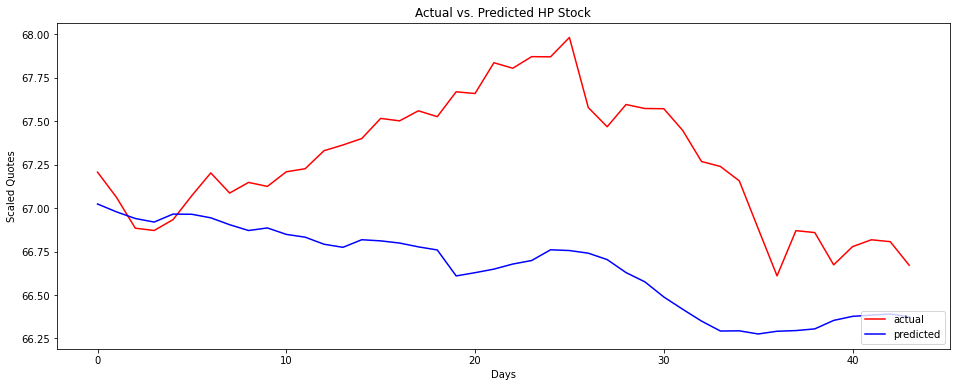

[('2018-09-04', [67.20673424319445], array([67.02352], dtype=float32)), ('2018-09-05', [67.06241853458556], array([66.97838], dtype=float32)), ('2018-09-06', [66.88421075955354], array([66.940025], dtype=float32)), ('2018-09-07', [66.87109084636272], array([66.919556], dtype=float32)), ('2018-09-10', [66.93340897430468], array([66.96531], dtype=float32)), ('2018-09-11', [67.0722586780093], array([66.964294], dtype=float32)), ('2018-09-12', [67.20236093879751], array([66.94388], dtype=float32)), ('2018-09-13', [67.08647129170745], array([66.90426], dtype=float32)), ('2018-09-14', [67.14769588501956], array([66.870834], dtype=float32)), ('2018-09-17', [67.12473666252751], array([66.885666], dtype=float32)), ('2018-09-18', [67.20892131245418], array([66.84857], dtype=float32)), ('2018-09-19', [67.2264136959194], array([66.83255], dtype=float32)), ('2018-09-20', [67.33027779857102], array([66.79188], dtype=float32)), ('2018-09-21', [67.36307633036428], array([66.77415], dtype=float32)), ('

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


1.7909564822177573
5.636437259929344
2.3741182068147624


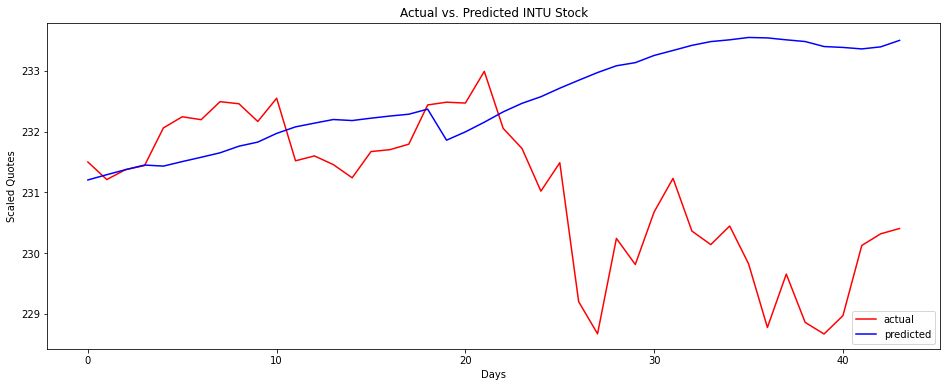

[('2018-09-04', [231.49915711964556], array([231.20392], dtype=float32)), ('2018-09-05', [231.2099823627235], array([231.29044], dtype=float32)), ('2018-09-06', [231.37502306147462], array([231.37292], dtype=float32)), ('2018-09-07', [231.43991190617706], array([231.44902], dtype=float32)), ('2018-09-10', [232.0605778922025], array([231.43166], dtype=float32)), ('2018-09-11', [232.24395716384194], array([231.50642], dtype=float32)), ('2018-09-12', [232.19599490801204], array([231.57703], dtype=float32)), ('2018-09-13', [232.4922231277692], array([231.65054], dtype=float32)), ('2018-09-14', [232.4583677976095], array([231.75938], dtype=float32)), ('2018-09-17', [232.16637337748512], array([231.82692], dtype=float32)), ('2018-09-18', [232.5486465256207], array([231.97037], dtype=float32)), ('2018-09-19', [231.51890552413505], array([232.07779], dtype=float32)), ('2018-09-20', [231.59930897369424], array([232.13898], dtype=float32)), ('2018-09-21', [231.4568384950496], array([232.19862], 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


2.0430270565015305
7.603886934952791
2.757514630052358


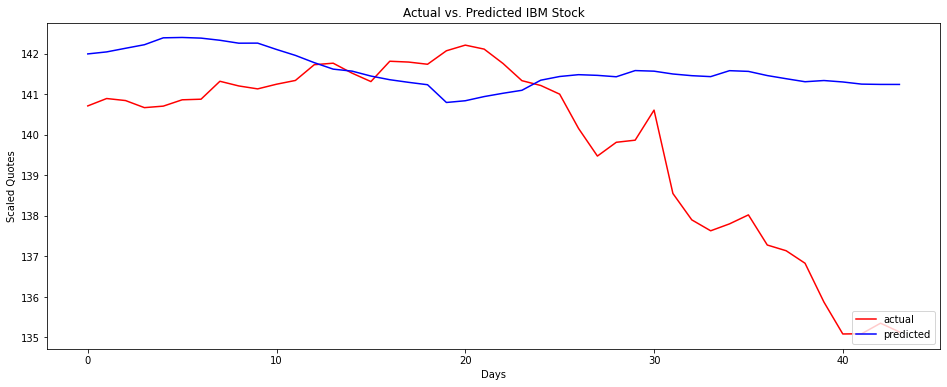

[('2018-09-04', [140.71509057193254], array([141.99834], dtype=float32)), ('2018-09-05', [140.89726904726282], array([142.04788], dtype=float32)), ('2018-09-06', [140.84707678679246], array([142.13745], dtype=float32)), ('2018-09-07', [140.67233567269153], array([142.22517], dtype=float32)), ('2018-09-10', [140.70951396927163], array([142.39536], dtype=float32)), ('2018-09-11', [140.8656673533436], array([142.40425], dtype=float32)), ('2018-09-12', [140.8805392392801], array([142.38808], dtype=float32)), ('2018-09-13', [141.32296579067108], array([142.33508], dtype=float32)), ('2018-09-14', [141.2077122203161], array([142.263], dtype=float32)), ('2018-09-17', [141.13521354920212], array([142.26456], dtype=float32)), ('2018-09-18', [141.2504671195571], array([142.108], dtype=float32)), ('2018-09-19', [141.34341427926847], array([141.96169], dtype=float32)), ('2018-09-20', [141.73193272609666], array([141.78236], dtype=float32)), ('2018-09-21', [141.76911385919897], array([141.6228], dty

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


2.43370301445897
7.786490361679942
2.7904283473474


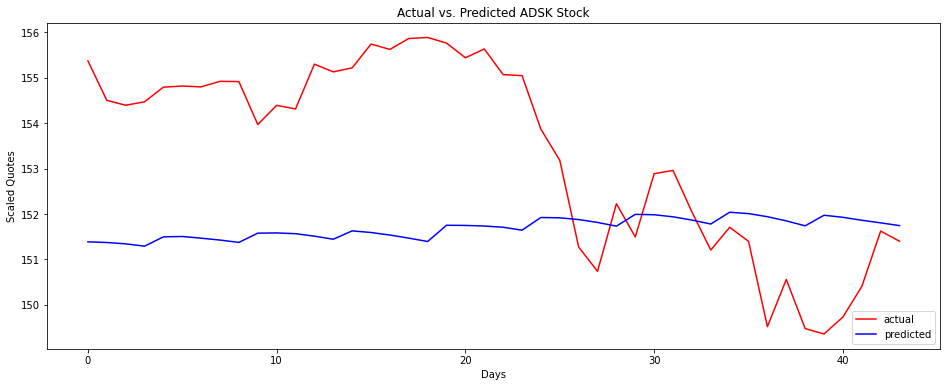

[('2018-09-04', [155.37306258869845], array([151.3877], dtype=float32)), ('2018-09-05', [154.5034334862468], array([151.3734], dtype=float32)), ('2018-09-06', [154.39524030383754], array([151.34378], dtype=float32)), ('2018-09-07', [154.47077057063836], array([151.29218], dtype=float32)), ('2018-09-10', [154.79330985373068], array([151.49756], dtype=float32)), ('2018-09-11', [154.81780548298346], array([151.50575], dtype=float32)), ('2018-09-12', [154.79943376104387], array([151.46819], dtype=float32)), ('2018-09-13', [154.92191813712193], array([151.4267], dtype=float32)), ('2018-09-14', [154.91579422980874], array([151.37509], dtype=float32)), ('2018-09-17', [153.97063174564917], array([151.57875], dtype=float32)), ('2018-09-18', [154.3931969247951], array([151.58397], dtype=float32)), ('2018-09-19', [154.31358301481646], array([151.56706], dtype=float32)), ('2018-09-20', [155.29957258603304], array([151.51308], dtype=float32)), ('2018-09-21', [155.13013721558477], array([151.44507],

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


1.234244114828769
1.599688719816524
1.2647880137859167


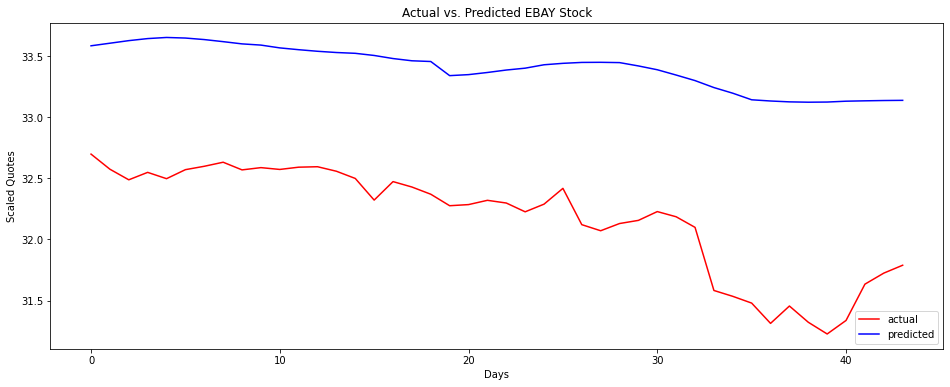

[('2018-09-04', [32.69846682073124], array([33.58513], dtype=float32)), ('2018-09-05', [32.57484763990358], array([33.606243], dtype=float32)), ('2018-09-06', [32.48812924486261], array([33.627357], dtype=float32)), ('2018-09-07', [32.549016808317944], array([33.64417], dtype=float32)), ('2018-09-10', [32.49735444130929], array([33.653316], dtype=float32)), ('2018-09-11', [32.571157420557434], array([33.64858], dtype=float32)), ('2018-09-12', [32.59883300989746], array([33.636093], dtype=float32)), ('2018-09-13', [32.632044280175386], array([33.619038], dtype=float32)), ('2018-09-14', [32.56931195896567], array([33.60078], dtype=float32)), ('2018-09-17', [32.58776305569639], array([33.59087], dtype=float32)), ('2018-09-18', [32.57300217831182], array([33.56797], dtype=float32)), ('2018-09-19', [32.59145327504254], array([33.553165], dtype=float32)), ('2018-09-20', [32.59514349438869], array([33.54023], dtype=float32)), ('2018-09-21', [32.558242004764615], array([33.530125], dtype=float

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


3.629808046241845
15.859658492540756
3.9824186736882345


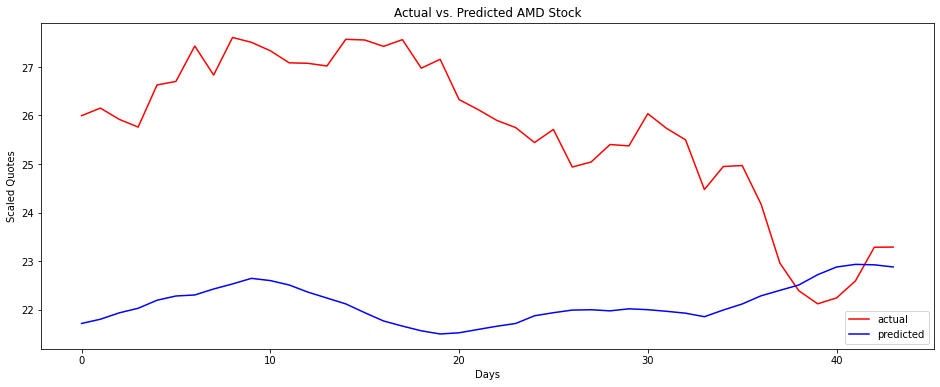

[('2018-09-04', [25.99565833246231], array([21.712862], dtype=float32)), ('2018-09-05', [26.151314669571292], array([21.800303], dtype=float32)), ('2018-09-06', [25.91956004529594], array([21.932081], dtype=float32)), ('2018-09-07', [25.760444605167148], array([22.02592], dtype=float32)), ('2018-09-10', [26.628659670444783], array([22.191622], dtype=float32)), ('2018-09-11', [26.701299514347784], array([22.279074], dtype=float32)), ('2018-09-12', [27.431153097859017], array([22.300291], dtype=float32)), ('2018-09-13', [26.83274213031814], array([22.42362], dtype=float32)), ('2018-09-14', [27.607564053086826], array([22.527756], dtype=float32)), ('2018-09-17', [27.507252044781826], array([22.642653], dtype=float32)), ('2018-09-18', [27.334300852330262], array([22.596987], dtype=float32)), ('2018-09-19', [27.085250712955883], array([22.506031], dtype=float32)), ('2018-09-20', [27.074874063652913], array([22.358088], dtype=float32)), ('2018-09-21', [27.019529734848927], array([22.237154],

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:216: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


3.156664369095324
11.498030277942178
3.3908745594524987


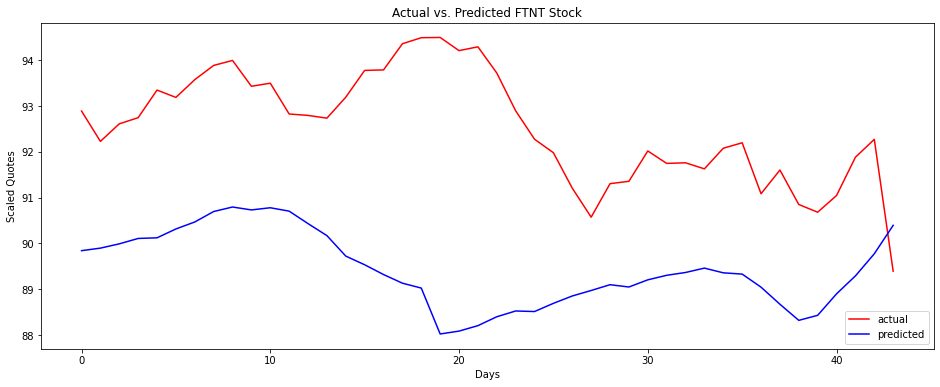

[('2018-09-04', [92.89023353336447], array([89.84098], dtype=float32)), ('2018-09-05', [92.22790846679055], array([89.896576], dtype=float32)), ('2018-09-06', [92.61081523842914], array([89.98983], dtype=float32)), ('2018-09-07', [92.74534887642845], array([90.10759], dtype=float32)), ('2018-09-10', [93.34816742738747], array([90.12181], dtype=float32)), ('2018-09-11', [93.18776216368197], array([90.31485], dtype=float32)), ('2018-09-12', [93.57584247091042], array([90.46761], dtype=float32)), ('2018-09-13', [93.88630592714175], array([90.695694], dtype=float32)), ('2018-09-14', [93.99496793943486], array([90.79427], dtype=float32)), ('2018-09-17', [93.4309578139744], array([90.73088], dtype=float32)), ('2018-09-18', [93.4982256199133], array([90.77805], dtype=float32)), ('2018-09-19', [92.82555348215972], array([90.70407], dtype=float32)), ('2018-09-20', [92.79450634698519], array([90.43187], dtype=float32)), ('2018-09-21', [92.7350018052488], array([90.16972], dtype=float32)), ('2018

In [5]:
def init_spark():
    spark = SparkSession \
        .builder \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()
    return spark

# read and clean the csv
spark = init_spark()
filename = '/content/drive/MyDrive/data/stock_histories.csv'
df = spark.read.csv(filename, header=True, mode="DROPMALFORMED")

# get list of unique companies
companies = [i.stock for i in df.select(col("stock")).distinct().collect()]
# companies = ['NVDA','INTU', 'FTNT', 'IBM', 'EBAY','HP', 'ADSK', 'EA', 'AMD']
print(companies)


for company in companies:
  df = df.withColumn("volume",df.volume.cast(IntegerType()))
  df = df.withColumn("open",df.open.cast(FloatType()))
  df = df.withColumn("close",df.close.cast(FloatType()))
  df = df.withColumn("adjusted_close",df.close.cast(FloatType()))
  df = df.withColumn("high",df.high.cast(FloatType()))
  df = df.withColumn("low",df.low.cast(FloatType()))

  company_name = company 

  # try to engineer features a bit differentlyKK
  # predict for the last 60 days, use last 7, 14, 60, 90, 120 day moving averages as predictors

  company_df = df.where(df.stock == company_name)
  company_df = company_df.withColumn("quarter", quarter(col("date")))
  company_df = company_df.withColumn("week_of_year", weekofyear(col("date")))
  company_df = company_df.withColumn("year", year(col("date")))
  company_df = company_df.withColumn("day_of_week", dayofweek(col("date")))
  w = (Window.orderBy(col("date")).rowsBetween(-7, -1))
  company_df = company_df.withColumn('open_avg_l7', avg('open').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_open_avg_l7', lag('open_avg_l7', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('open_avg_l7')

  w = (Window.orderBy(col("date")).rowsBetween(-14, -1))
  company_df = company_df.withColumn('open_avg_l14', avg('open').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_open_avg_l14', lag('open_avg_l14', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('open_avg_l14')

  w = (Window.orderBy(col("date")).rowsBetween(-60, -1))
  company_df = company_df.withColumn('open_avg_l60', avg('open').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_open_avg_l60', lag('open_avg_l60', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('open_avg_l60')

  w = (Window.orderBy(col("date")).rowsBetween(-90, -1))
  company_df = company_df.withColumn('open_avg_l90', avg('open').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_open_avg_l90', lag('open_avg_l90', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('open_avg_l90')

  w = (Window.orderBy(col("date")).rowsBetween(-120, -1))
  company_df = company_df.withColumn('open_avg_l120', avg('open').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_open_avg_l120', lag('open_avg_l120', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('open_avg_l120')
  company_df.columns
  company_df.head(10)
  w = (Window.orderBy(col("date")).rowsBetween(-7, -1))
  company_df = company_df.withColumn('close_avg_l7', avg('close').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_close_avg_l7', lag('close_avg_l7', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('close_avg_l7')

  w = (Window.orderBy(col("date")).rowsBetween(-14, -1))
  company_df = company_df.withColumn('close_avg_l14', avg('close').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_close_avg_l14', lag('close_avg_l14', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('close_avg_l14')

  w = (Window.orderBy(col("date")).rowsBetween(-60, -1))
  company_df = company_df.withColumn('close_avg_l60', avg('close').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_close_avg_l60', lag('close_avg_l60', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('close_avg_l60')

  w = (Window.orderBy(col("date")).rowsBetween(-90, -1))
  company_df = company_df.withColumn('close_avg_l90', avg('close').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_close_avg_l90', lag('close_avg_l90', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('close_avg_l90')

  w = (Window.orderBy(col("date")).rowsBetween(-120, -1))
  company_df = company_df.withColumn('close_avg_l120', avg('close').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_close_avg_l120', lag('close_avg_l120', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('close_avg_l120')
  w = (Window.orderBy(col("date")).rowsBetween(-7, -1))
  company_df = company_df.withColumn('high_avg_l7', avg('high').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_high_avg_l7', lag('high_avg_l7', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('high_avg_l7')

  w = (Window.orderBy(col("date")).rowsBetween(-14, -1))
  company_df = company_df.withColumn('high_avg_l14', avg('high').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_high_avg_l14', lag('high_avg_l14', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('high_avg_l14')

  w = (Window.orderBy(col("date")).rowsBetween(-60, -1))
  company_df = company_df.withColumn('high_avg_l60', avg('high').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_high_avg_l60', lag('high_avg_l60', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('high_avg_l60')

  w = (Window.orderBy(col("date")).rowsBetween(-90, -1))
  company_df = company_df.withColumn('high_avg_l90', avg('high').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_high_avg_l90', lag('high_avg_l90', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('high_avg_l90')

  w = (Window.orderBy(col("date")).rowsBetween(-120, -1))
  company_df = company_df.withColumn('high_avg_l120', avg('high').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_high_avg_l120', lag('high_avg_l120', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('high_avg_l120')
  w = (Window.orderBy(col("date")).rowsBetween(-7, -1))
  company_df = company_df.withColumn('low_avg_l7', avg('low').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_low_avg_l7', lag('low_avg_l7', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('low_avg_l7')

  w = (Window.orderBy(col("date")).rowsBetween(-14, -1))
  company_df = company_df.withColumn('low_avg_l14', avg('low').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_low_avg_l14', lag('low_avg_l14', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('low_avg_l14')

  w = (Window.orderBy(col("date")).rowsBetween(-60, -1))
  company_df = company_df.withColumn('low_avg_l60', avg('low').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_low_avg_l60', lag('low_avg_l60', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('low_avg_l60')

  w = (Window.orderBy(col("date")).rowsBetween(-90, -1))
  company_df = company_df.withColumn('low_avg_l90', avg('low').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_low_avg_l90', lag('low_avg_l90', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('low_avg_l90')

  w = (Window.orderBy(col("date")).rowsBetween(-120, -1))
  company_df = company_df.withColumn('low_avg_l120', avg('low').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_low_avg_l120', lag('low_avg_l120', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('low_avg_l120')
  w = (Window.orderBy(col("date")).rowsBetween(-7, -1))
  company_df = company_df.withColumn('adjusted_close_avg_l7', avg('adjusted_close').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_adjusted_close_avg_l7', lag('adjusted_close_avg_l7', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('adjusted_close_avg_l7')

  w = (Window.orderBy(col("date")).rowsBetween(-14, -1))
  company_df = company_df.withColumn('adjusted_close_avg_l14', avg('adjusted_close').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_adjusted_close_avg_l14', lag('adjusted_close_avg_l14', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('adjusted_close_avg_l14')

  w = (Window.orderBy(col("date")).rowsBetween(-60, -1))
  company_df = company_df.withColumn('adjusted_close_avg_l60', avg('adjusted_close').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_adjusted_close_avg_l60', lag('adjusted_close_avg_l60', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('adjusted_close_avg_l60')

  w = (Window.orderBy(col("date")).rowsBetween(-90, -1))
  company_df = company_df.withColumn('adjusted_close_avg_l90', avg('adjusted_close').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_adjusted_close_avg_l90', lag('adjusted_close_avg_l90', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('adjusted_close_avg_l90')

  w = (Window.orderBy(col("date")).rowsBetween(-120, -1))
  company_df = company_df.withColumn('adjusted_close_avg_l120', avg('adjusted_close').over(w)).orderBy('date')
  company_df = company_df.withColumn('lagged_adjusted_close_avg_l120', lag('adjusted_close_avg_l120', 60).over(Window.orderBy(col("date"))))
  company_df = company_df.drop('adjusted_close_avg_l120')
  from datetime import datetime, timedelta

  last_day = company_df.orderBy('date', ascending=False).select('date').first()[0]
  threshold = datetime.strptime(last_day, '%Y-%m-%d').date() - timedelta(days=60)
  company_df = company_df.withColumn("is_test", when(col("date") >= threshold, 1).otherwise(0))
  # drop rows with nulls (i.e. first four quarters)
  company_df = company_df.na.drop()
  company_df = company_df.toPandas()
  predictor_features = ['quarter', 'week_of_year', 'year', 'day_of_week',
                        'lagged_open_avg_l7', 'lagged_open_avg_l14', 'lagged_open_avg_l60',
                        'lagged_open_avg_l90', 'lagged_open_avg_l120', 'lagged_high_avg_l7',
                        'lagged_high_avg_l14', 'lagged_high_avg_l60', 'lagged_high_avg_l90',
                        'lagged_high_avg_l120', 'lagged_low_avg_l7', 'lagged_low_avg_l14',
                        'lagged_low_avg_l60', 'lagged_low_avg_l90', 'lagged_low_avg_l120',
                        'lagged_close_avg_l7', 'lagged_close_avg_l14', 'lagged_close_avg_l60',
                        'lagged_close_avg_l90', 'lagged_close_avg_l120',
                        'lagged_adjusted_close_avg_l7', 'lagged_adjusted_close_avg_l14',
                        'lagged_adjusted_close_avg_l60', 'lagged_adjusted_close_avg_l90',
                        'lagged_adjusted_close_avg_l120']
  len(predictor_features)
  from sklearn.preprocessing import MinMaxScaler

  # scale the arrays to keep the values between 0 and 1 to match outcomes found in sigmoid or step functions that are used for activation.
  minMaxScale = MinMaxScaler()
  all_features = predictor_features.copy()
  all_features.append('adjusted_close')

  minMaxScale.fit(company_df[company_df.is_test == 0][all_features])
  testingset = minMaxScale.transform(company_df[company_df.is_test == 1][all_features])
  trainingset = minMaxScale.transform(company_df[company_df.is_test == 0][all_features])
  # x_train, x_test = company_df[company_df.is_test == 0][predictor_features], company_df[company_df.is_test == 1][predictor_features]
  # y_train, y_test = company_df[company_df.is_test == 0]['adjusted_close'], company_df[company_df.is_test == 1]['adjusted_close']
  x_train, x_test = trainingset[:, 0:-1], testingset[:, 0:-1]
  y_train, y_test = trainingset[:, -1:], testingset[:, -1:]
  y_test_dates = company_df[company_df.is_test == 1]['date']

  len(predictor_features)
  import numpy as np
  from keras import models, layers

  # Build a Sequential model
  model = models.Sequential()
  model.add(layers.LSTM(1, input_shape=(1,len(predictor_features)), return_sequences=True))
  model.add(layers.LSTM(1, input_shape=(1,len(predictor_features))))
  model.add(layers.Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  # Transform the testing and training data sets into three-dimensional arrays,  batch size, a number of time steps, and a number of features
  x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
  x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

  print('The shape of xtrain is {}: '.format(x_train.shape))
  print('The shape of xtest is {}: '.format(x_test.shape))
  # train the model
  loss = model.fit(x_train, y_train, batch_size=10, epochs=100)
  # testing the model
  predict = model.predict(x_test)
  predict
  # convert testing values and prediction values back to original form, before calculating the RMSE
  ytest_to_inverse = company_df[company_df.is_test == 1]['adjusted_close']
  np.array(ytest_to_inverse)
  ytest_to_inverse=ytest_to_inverse[:,np.newaxis]
  minMaxScale.fit_transform(ytest_to_inverse)
  predict = minMaxScale.inverse_transform(predict)
  y_test = minMaxScale.inverse_transform(y_test)
  company_df[company_df.is_test == 1]["adjusted_close"]
  print(metrics.mean_absolute_error(y_test, predict))
  print(metrics.mean_squared_error(y_test, predict))
  print(np.sqrt(metrics.mean_squared_error(y_test, predict)))
  # print(metrics.r2_score(y_test, predict))
  [(y_test.tolist()[i], predict[i]) for i in range(len(y_test))]
  from matplotlib import pyplot as plt
  # Combine the predicted and ytest arrays into a single unified array
  combined_array = np.concatenate((y_test, predict), axis = 1)
  # plot a side by side comparison of Actual versus Predicted stock to compare trends
  plt.figure(figsize=(16,6))
  plt.plot(combined_array[:,0],color='red', label='actual')
  plt.plot(combined_array[:,1],color='blue', label='predicted')
  plt.legend(loc = 'lower right')
  plt.title('Actual vs. Predicted ' + company_name + ' Stock')
  plt.xlabel('Days')
  plt.ylabel('Scaled Quotes')
  plt.savefig("lagged-" + company_name+".png")

  plt.show()


  output = [(y_test_dates.tolist()[i], y_test.tolist()[i], predict[i]) for i in range(len(y_test))]
  print(output)

  #save quartely model to disk
  header_list = ["date", "test_value", "predicted_value"]
  with open("/content/drive/MyDrive/laggedFeatures_LSTM/laggedFeatures-" + company_name + "-results.csv", mode='w') as file:
      csv_out = csv.writer(file)
      csv_out.writerow(header_list)
      for row in output:
          csv_out.writerow(row)
      csv_out.writerow([np.sqrt(metrics.mean_squared_error(y_test, predict))])
# look at feature importance after all the features are engineered